# 교통사고 유형별 발생 분석
- 공공데이터 교통사고 유형 / 검색어는 전국 교통사고 다발지역 표준데이터
<hr>
- https://www.data.go.kr/data/15029185/standard.do
- 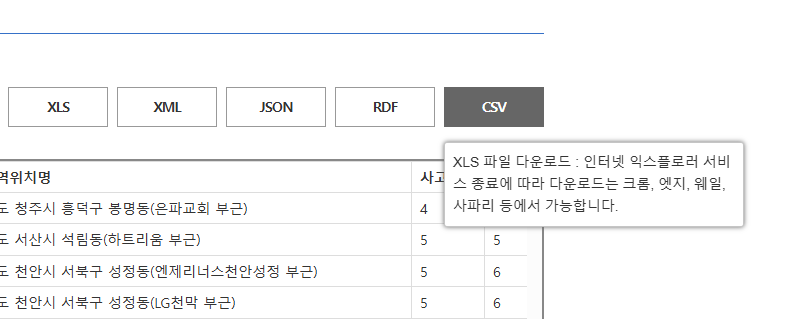

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from datetime import datetime

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"]="D2Coding"

In [ ]:
file_path = "./ref/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori

In [ ]:
ort_data = ori.copy
ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name="count")
ori_data = ori_data.sort_values("count",ascending = False)
ori_data = ori_data.rename(columns={"사고유형구분":"type"})
ori_data

In [ ]:
ori_data.plot(kind="pie",y = "count", labels = ori_data["type"],startangle = 0, autopct="%2.1f%%",figsize=(10,10), title = "각 사고유형별 발생 통계", cmap = matplotlib.cm.Blues)

plt.savefig("./chart/accidenting.png")
plt.show()

In [ ]:
ex_data = ori.copy()
ex_data = ex_data.rename(columns={"사고유형구분":"type","사고연도":"year","사고건수":"accident"})
ex_data
arr_data = list(set(ex_data["type"]))
data_list = []
for n in arr_data:
    data_list.append(ex_data[ex_data["type"] == n])
print(arr_data,data_list)

In [ ]:
total_list = []
for n in data_list:
    result = n.groupby("year")["accident"].sum().reset_index(name="count")
    total_list.append(result)
total_list
for a in range(0,5):
    total_list[a].plot(
        kind="pie",
        y = "count",
        labels = total_list[a]["year"],
        figsize = (5,5),
        autopct = "%.1f%%",
        title = f"연도별 {arr_data[a]} 사고 발생 통계",
        cmap = matplotlib.cm.Blues,
        startangle = 90,
    )
    plt.savefig(f"./ref/chart/chart{a}.png")
plt.show()

In [ ]:
from IPython.display import display, HTML
# HTML 생성
html = f"""
<div style="display: flex ;flex-wrap:wrap;width:1000px;">
    <div style="flex: 1; min-width:300px";>
        <div style="padding: 10px 0 10px 80px;">
        <h3>Data Table</h3>
        {ori_data.to_html(index=False)}
        </div>
    </div>"""
for v in range(len(arr_data)):
    html += f"""<div style="flex: 1; padding: 10px; min-width:300px">
            <h3>Pie Chart{v+1}</h3>
            <img src="./ref/chart/chart{v}.png" alt="Pie Chart">
        </div>"""
html+=f"""</div> """
    # HTML 표시m
# print(html)
display(HTML(html))

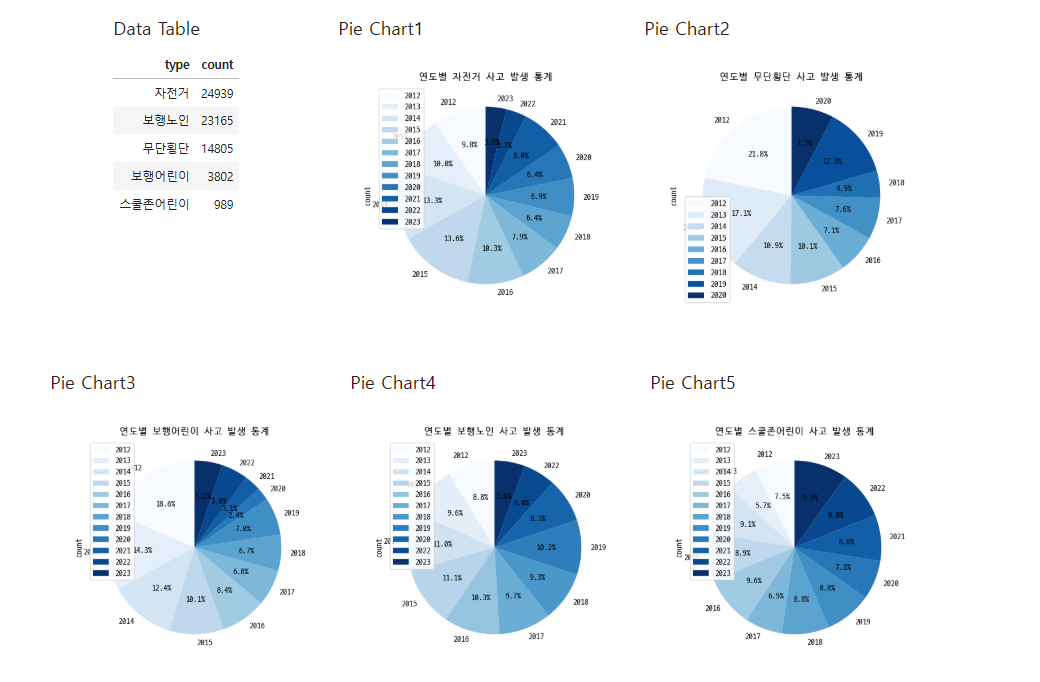

### 교통사고분석

- 전반적인 데이터 분석

전반적으로 스쿨존어린이 사고 발생율을 제외한 모든 사고 발생률은 과거에 비해 점차 하락세를 띄고 있음
이는 과거에 비해 교통관리 및 법안이 과거에 비해 집약적으로 발달하여 사고발생율이 전체적으로 하락했다 볼 수 있음.
스쿨존어린이 사고 발생율은 과거에 비해 점차 증가하는 모습을 보이고 있는데 이는 과거에 전국적으로 스쿨존이 적었다. 현재는 스쿨존을 전국적으로 확대하여 영유아나 학생들을 보호에 힘을 썻지만 사고자체를 막지못해  스쿨존이 증가하였지만 사고발생자체는 떨어지지않아 발생율이 증가 하는것으로 보인다.